In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, cv2, struct

caffe_root = '/home/heyanguang/caffecode/caffe/'
sys.path.insert(0, caffe_root + 'python')
os.chdir(caffe_root)
import caffe

caffe.set_device(0)
caffe.set_mode_gpu()
solver = caffe.SGDSolver('examples/cifar10/cifar10_quick_solver_py.prototxt')

niter = 4000
niter1 = 6001

test_interval = 200
train_loss = np.zeros(niter + niter1)
test_acc = np.zeros(int(np.ceil((niter + niter1)/test_interval)))

# the main solver loop
for it in range(niter):
    solver.step(1)
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    solver.test_nets[0].forward(start = 'conv1')
    
    if it % test_interval == 0:
        acc = solver.test_nets[0].blobs['accuracy'].data
        print 'Iteration', it, 'testing...', 'accuracy: ', acc
        test_acc[it/test_interval] = acc
        
        
solver = caffe.SGDSolver('examples/cifar10/cifar10_quick_solver_lr1_py.prototxt')
solver.restore('examples/cifar10/cifar10_quick_py_iter_4000.solverstate')

# the main solver loop
for it in range(niter, niter + niter1):
    solver.step(1)
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    solver.test_nets[0].forward(start = 'conv1')
    
    if it % test_interval == 0:
        acc = solver.test_nets[0].blobs['accuracy'].data
        print 'Iteration', it, 'testing...', 'accuracy: ', acc
        test_acc[it/test_interval] = acc
        

Iteration 0 testing... accuracy:  0.20000000298
Iteration 200 testing... accuracy:  0.430000007153
Iteration 400 testing... accuracy:  0.419999986887
Iteration 600 testing... accuracy:  0.509999990463
Iteration 800 testing... accuracy:  0.589999973774
Iteration 1000 testing... accuracy:  0.600000023842
Iteration 1200 testing... accuracy:  0.639999985695
Iteration 1400 testing... accuracy:  0.610000014305
Iteration 1600 testing... accuracy:  0.639999985695
Iteration 1800 testing... accuracy:  0.699999988079
Iteration 2000 testing... accuracy:  0.699999988079
Iteration 2200 testing... accuracy:  0.629999995232
Iteration 2400 testing... accuracy:  0.639999985695
Iteration 2600 testing... accuracy:  0.699999988079
Iteration 2800 testing... accuracy:  0.699999988079
Iteration 3000 testing... accuracy:  0.72000002861
Iteration 3200 testing... accuracy:  0.689999997616
Iteration 3400 testing... accuracy:  0.649999976158
Iteration 3600 testing... accuracy:  0.730000019073
Iteration 3800 testin

IndexError: index 50 is out of bounds for axis 0 with size 50

In [1]:
print len(test_acc)
test_interval
test_interval * np.arange(len(test_acc))

NameError: name 'test_acc' is not defined

[ 0.14        0.40000001  0.47        0.52999997  0.63        0.61000001
  0.66000003  0.62        0.67000002  0.69999999  0.67000002  0.69999999
  0.67000002  0.69999999  0.70999998  0.69        0.70999998  0.69999999
  0.70999998  0.75        0.75999999  0.81        0.77999997  0.80000001
  0.80000001  0.77999997  0.80000001  0.79000002  0.79000002  0.79000002
  0.77999997  0.77999997  0.80000001  0.79000002  0.79000002  0.77999997
  0.79000002  0.81        0.81        0.81        0.79000002  0.79000002
  0.81        0.81        0.81        0.77999997  0.79000002  0.81        0.81
  0.81      ]


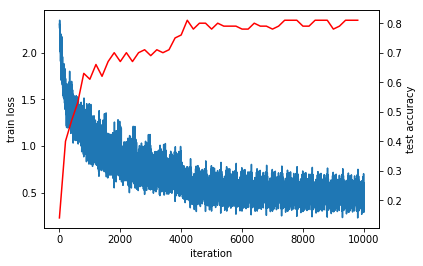

In [37]:
print test_acc
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter + niter1), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')


plt.show()
